<a href="https://colab.research.google.com/github/m-rafiul-islam/driver-behavior-model/blob/main/emperical_data_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis 


In [2]:
import pandas as pd

[3 Ways to Load CSV files into Colab](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92#:~:text=2)%20From%20a%20local%20drive&text=Click%20on%20%E2%80%9CChoose%20Files%E2%80%9D%20then,name%20of%20the%20uploaded%20file).)




In [3]:
raw_data_link = 'https://raw.githubusercontent.com/m-rafiul-islam/driver-behavior-model/main/RAllCarDataTime350.csv'
car_data = pd.read_csv(raw_data_link) 

In [4]:
car_data.head()

,time,nthcar,speed,x,y,z
0,0.0,1,7.2289,12.209,0.220200,-0.90701
1,0.1,1,7.2298,12.117,0.008769,-0.92513
2,0.2,1,7.1965,12.025,-0.333190,-0.91394
3,0.3,1,7.1247,11.938,-0.717440,-0.87312
4,0.4,1,7.0152,11.857,-1.095500,-0.80384


In [5]:
car_data

,time,nthcar,speed,x,y,z
0,0.0,1,7.2289,12.209,0.220200,-0.90701
1,0.1,1,7.2298,12.117,0.008769,-0.92513
2,0.2,1,7.1965,12.025,-0.333190,-0.91394
3,0.3,1,7.1247,11.938,-0.717440,-0.87312
4,0.4,1,7.0152,11.857,-1.095500,-0.80384
...,...,...,...,...,...,...
349995,34.6,1000,6.1081,19.781,-0.541750,1.34520
349996,34.7,1000,6.0338,19.927,-0.742640,1.46200
349997,34.8,1000,5.9423,20.085,-0.915130,1.58220
349998,34.9,1000,5.8498,20.254,-0.924930,1.68960


In [6]:
car_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350000 entries, 0 to 349999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    350000 non-null  float64
 1   nthcar  350000 non-null  int64  
 2   speed   350000 non-null  float64
 3   x       350000 non-null  float64
 4   y       350000 non-null  float64
 5   z       350000 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 16.0 MB


In [7]:
car_data.describe()

,time,nthcar,speed,x,y,z
count,350000.000000,350000.000000,350000.000000,350000.000000,350000.000000,350000.000000
mean,17.500571,500.500000,6.715864,18.485965,-0.044364,-0.044284
std,10.146930,288.675403,2.553528,9.313234,0.930268,1.408721
min,0.000000,1.000000,0.000000,-1.959300,-4.837500,-10.542000
25%,8.700000,250.750000,5.171300,12.200000,-0.452750,-0.764900
50%,17.550000,500.500000,6.993600,16.208000,-0.000937,0.002035
75%,26.300000,750.250000,8.512800,22.191250,0.376553,0.754363
max,35.000000,1000.000000,17.981000,113.030000,5.142500,15.328000


Maximum speed is apprroximate 18 m/s (40mi/h). So, I assumed desired speed limit, v_0 = 20 m/s. 
Initial speed of the follower vehichle 6.72 m/s. 
Initial position of the leader- and follower- vehicle are 18.49 m and 0 m respectively.  So close! 

Initial position of the leader- and follower- vehicle are 113 m and 0 m respectively.



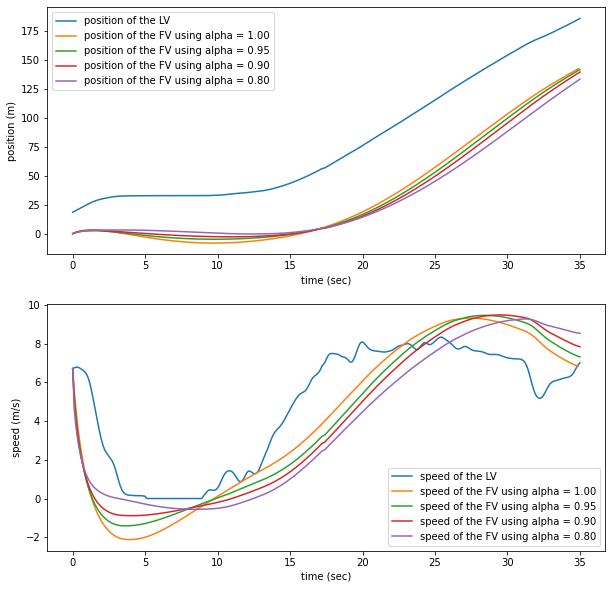

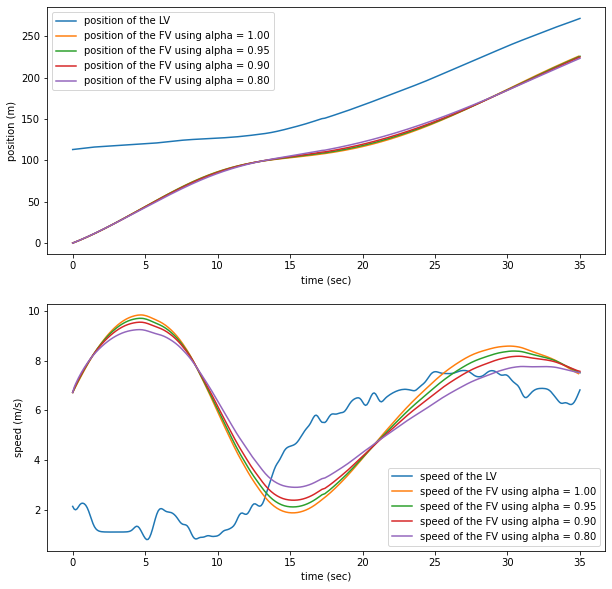

In [12]:
number_of_car = car_data['nthcar'].unique()
number_of_car
# len(number_of_car) 

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [ ]:
import seaborn as sns

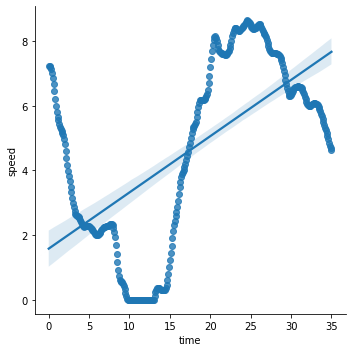

In [ ]:
sns.lmplot(x='time', y='speed', data = car_data[car_data['nthcar']==1]) 

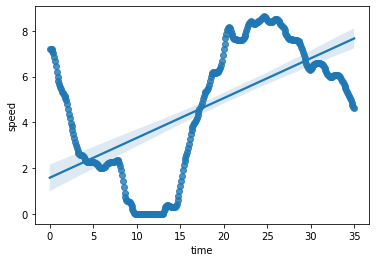

In [ ]:
# sns.regplot(x='time', y='speed', data = car_data) 
sns.regplot(x='time', y='speed', data = car_data[car_data['nthcar']==1]) 